In [15]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
old = pd.read_csv('../data/oldweightedstanford.tsv', sep = '\t', index_col = 'docid')
old.head()

,allwords,stanfordwords
docid,,
mdp.39015063561586,57056.0,1586.0
uiuo.ark+=13960=t8nc6b618,47093.0,1138.0
uc1.$b473613,84661.0,4248.0
nyp.33433074931597,73251.0,2434.0
loc.ark+=13960=t08w4945p,3260.0,136.0


In [22]:
new = pd.read_csv('../data/weightedstanford.tsv', sep = '\t', index_col = 'docid')
new.head()

,allwords,stanfordwords
docid,,
mdp.39015063561586,57056.0,1618.0
uiuo.ark+=13960=t8nc6b618,47092.0,1150.0
uc1.$b473613,84661.0,4255.0
nyp.33433074931597,73251.0,2437.0
loc.ark+=13960=t08w4945p,3260.0,137.0


In [23]:
new['ratio'] = new.stanfordwords / new.allwords
new.head()

,allwords,stanfordwords,ratio
docid,,,
mdp.39015063561586,57056.0,1618.0,0.028358
uiuo.ark+=13960=t8nc6b618,47092.0,1150.0,0.024420
uc1.$b473613,84661.0,4255.0,0.050259
nyp.33433074931597,73251.0,2437.0,0.033269
loc.ark+=13960=t08w4945p,3260.0,137.0,0.042025


In [24]:
old['ratio'] = old.stanfordwords / old.allwords
old.head()

,allwords,stanfordwords,ratio
docid,,,
mdp.39015063561586,57056.0,1586.0,0.027797
uiuo.ark+=13960=t8nc6b618,47093.0,1138.0,0.024165
uc1.$b473613,84661.0,4248.0,0.050177
nyp.33433074931597,73251.0,2434.0,0.033228
loc.ark+=13960=t08w4945p,3260.0,136.0,0.041718


In [25]:
new['diff'] = new.ratio - old.ratio
new.head()

,allwords,stanfordwords,ratio,diff
docid,,,,
mdp.39015063561586,57056.0,1618.0,0.028358,0.000561
uiuo.ark+=13960=t8nc6b618,47092.0,1150.0,0.024420,0.000255
uc1.$b473613,84661.0,4255.0,0.050259,0.000083
nyp.33433074931597,73251.0,2437.0,0.033269,0.000041
loc.ark+=13960=t08w4945p,3260.0,137.0,0.042025,0.000307


In [26]:
meta = pd.read_csv('../manuallists/weighted_subset.tsv', sep = '\t', index_col = 'docid')

In [27]:
new = new.join(meta.firstpub, how = 'left')
new.shape

(3050, 5)

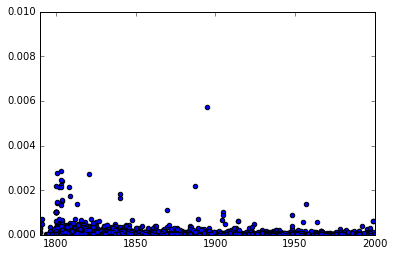

In [31]:
plt.scatter(new['firstpub'], new['diff'])
plt.xlim(1790, 2000)
plt.ylim(0, 0.01)
plt.show()